In [3]:
import findspark
findspark.init()
findspark.find()

import pyspark
from pyspark import SparkContext, SparkConf, SQLContext
from pyspark.sql import SparkSession

from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .master("local[*]") \
    .appName("GenericAppName") \
    .getOrCreate()
sc=spark.sparkContext
sqlContext = SQLContext(sc)

# Task I

In [4]:
# Ingest data 2015-2022
from pyspark import SparkFiles

players_15 = spark.read.csv('gs://dataproc-staging-us-west1-682917987486-wdaku6r5/FIFA_DATA/players_15.csv',header=True, inferSchema = True)
players_16 = spark.read.csv('gs://dataproc-staging-us-west1-682917987486-wdaku6r5/FIFA_DATA/players_16.csv',header=True, inferSchema = True)
players_17 = spark.read.csv('gs://dataproc-staging-us-west1-682917987486-wdaku6r5/FIFA_DATA/players_17.csv',header=True, inferSchema = True)
players_18 = spark.read.csv('gs://dataproc-staging-us-west1-682917987486-wdaku6r5/FIFA_DATA/players_18.csv',header=True, inferSchema = True)
players_19 = spark.read.csv('gs://dataproc-staging-us-west1-682917987486-wdaku6r5/FIFA_DATA/players_19.csv',header=True, inferSchema = True)
players_20 = spark.read.csv('gs://dataproc-staging-us-west1-682917987486-wdaku6r5/FIFA_DATA/players_20.csv',header=True, inferSchema = True)
players_21 = spark.read.csv('gs://dataproc-staging-us-west1-682917987486-wdaku6r5/FIFA_DATA/players_21.csv',header=True, inferSchema = True)
players_22 = spark.read.csv('gs://dataproc-staging-us-west1-682917987486-wdaku6r5/FIFA_DATA/players_22.csv',header=True, inferSchema = True)


In [5]:
print(players_15.columns[55])

movement_agility


In [6]:
#Add new column for the year
from pyspark.sql.functions import lit

players_15 = players_15.withColumn('Year', lit(2015))
players_16 = players_16.withColumn('Year', lit(2016))
players_17 = players_17.withColumn('Year', lit(2017))
players_18 = players_18.withColumn('Year', lit(2018))
players_19 = players_19.withColumn('Year', lit(2019))
players_20 = players_20.withColumn('Year', lit(2020))
players_21 = players_21.withColumn('Year', lit(2021))
players_22 = players_22.withColumn('Year', lit(2022))


In [7]:
#Ensure every record can be uniquely identified
#combine fifa id and year as index
from pyspark.sql import functions as sf

players_15 = players_15.withColumn('data_ID', sf.concat(sf.col('sofifa_id'),sf.lit('_'), sf.col('Year')))
players_16 = players_16.withColumn('data_ID', sf.concat(sf.col('sofifa_id'),sf.lit('_'), sf.col('Year')))
players_17 = players_17.withColumn('data_ID', sf.concat(sf.col('sofifa_id'),sf.lit('_'), sf.col('Year')))
players_18 = players_18.withColumn('data_ID', sf.concat(sf.col('sofifa_id'),sf.lit('_'), sf.col('Year')))
players_19 = players_19.withColumn('data_ID', sf.concat(sf.col('sofifa_id'),sf.lit('_'), sf.col('Year')))
players_20 = players_20.withColumn('data_ID', sf.concat(sf.col('sofifa_id'),sf.lit('_'), sf.col('Year')))
players_21 = players_21.withColumn('data_ID', sf.concat(sf.col('sofifa_id'),sf.lit('_'), sf.col('Year')))
players_22 = players_22.withColumn('data_ID', sf.concat(sf.col('sofifa_id'),sf.lit('_'), sf.col('Year')))

In [8]:
# union the data to one dataset
data = players_15.union(players_16)
data = data.union(players_17)
data = data.union(players_18)
data = data.union(players_19)
data = data.union(players_20)
data = data.union(players_21)
data = data.union(players_22)

In [9]:
# db_properties={}
# #update your db username
# db_properties['username']="postgres"
# #update your db password
# db_properties['password']="psql"
# #make sure you got the right port number here
# db_properties['url']= "jdbc:postgresql://localhost:5432/postgres"
# #make sure you had the Postgres JAR file in the right location
# db_properties['driver']="org.postgresql.Driver"
# db_properties['table']= "fifa.data"



# data.write.format("jdbc")\
# .mode("overwrite")\
# .option("url", db_properties['url'])\
# .option("dbtable", db_properties['table'])\
# .option("user", db_properties['username'])\
# .option("password", db_properties['password'])\
# .option("Driver", db_properties['driver'])\
# .save()


In [10]:
data.printSchema()

root
 |-- sofifa_id: integer (nullable = true)
 |-- player_url: string (nullable = true)
 |-- short_name: string (nullable = true)
 |-- long_name: string (nullable = true)
 |-- player_positions: string (nullable = true)
 |-- overall: integer (nullable = true)
 |-- potential: integer (nullable = true)
 |-- value_eur: double (nullable = true)
 |-- wage_eur: double (nullable = true)
 |-- age: integer (nullable = true)
 |-- dob: string (nullable = true)
 |-- height_cm: integer (nullable = true)
 |-- weight_kg: integer (nullable = true)
 |-- club_team_id: double (nullable = true)
 |-- club_name: string (nullable = true)
 |-- league_name: string (nullable = true)
 |-- league_level: integer (nullable = true)
 |-- club_position: string (nullable = true)
 |-- club_jersey_number: integer (nullable = true)
 |-- club_loaned_from: string (nullable = true)
 |-- club_joined: string (nullable = true)
 |-- club_contract_valid_until: integer (nullable = true)
 |-- nationality_id: integer (nullable = tru

In [11]:
# data_read = sqlContext.read.format("jdbc")\
#     .option("url", db_properties['url'])\
#     .option("dbtable", db_properties['table'])\
#     .option("user", db_properties['username'])\
#     .option("password", db_properties['password'])\
#     .option("Driver", db_properties['driver'])\
#     .load()

# data_read.show(1, vertical=True)

In [13]:
data_read = data

# Task II

#### Find X

In [33]:
#In order to find the club with highest numbers of players
#use where to find the data in 2022
#use .agg to Compute aggregates when(data_read["club_contract_valid_until"]=='2023' and returns the result as a DataFrame
#group the data by club name and sort them by the count of data
from pyspark.sql import functions as F
def findX(x):
    SORT_club = data_read.where(data_read['Year']=='2022').groupBy("club_name")
    highest_number_club = SORT_club.agg(F.count(F.when(data_read["club_contract_valid_until"]=='2023', "club_name")).alias("count")).sort("count",ascending=False).where(data_read['club_name']!='None')
    highest_number_club.show(x,vertical = True)
findX(5)

-RECORD 0-------------------------
 club_name | En Avant de Guingamp 
 count     | 19                   
-RECORD 1-------------------------
 club_name | Lechia Gdańsk        
 count     | 17                   
-RECORD 2-------------------------
 club_name | Club Atlético Lanús  
 count     | 17                   
-RECORD 3-------------------------
 club_name | Barnsley             
 count     | 16                   
-RECORD 4-------------------------
 club_name | Kasimpaşa SK         
 count     | 16                   
only showing top 5 rows



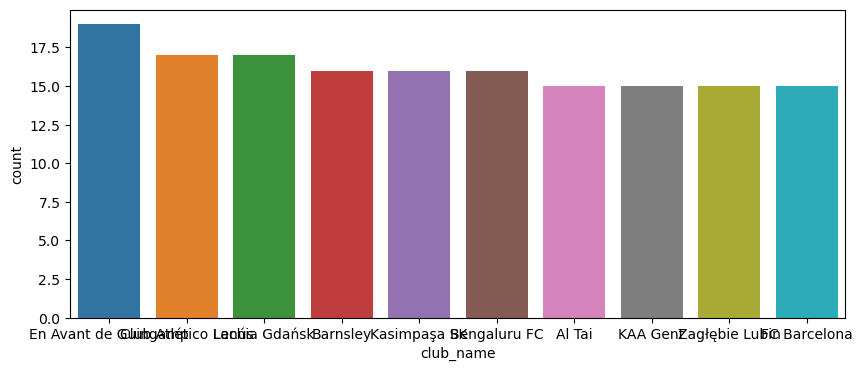

In [34]:
# we drew the barplot of the count to give a direct interpretation
import seaborn as sns
from IPython import display
import matplotlib.pyplot as plt

SORT_club = data_read.where(data_read['Year']=='2022').groupBy("club_name")
highest_number_club = SORT_club.agg(F.count(F.when(data_read["club_contract_valid_until"]=='2023', "club_name")).alias("count")).sort("count",ascending=False).where(data_read['club_name']!='None').toPandas()   
plt.figure( figsize = ( 10, 4 ) )
sns.barplot( x="club_name", y="count", data=highest_number_club[:10])
plt.show()

#### FindY

In [35]:
# the number of players older than 27 years oldfor each club
# we used where to find the players who are older than 27 and group the data by club_name, then we sort the data
# to find the club who has the highest number
# we sum the age for each club

import numpy as np
highest_number_over27_count = data_read.where(data_read['age']>27).groupBy("club_name").count().sort("count",ascending=False).toPandas()
highest_number_over27_sum = data_read.where(data_read['age']>27).groupBy("club_name").sum('age').toPandas()
print(highest_number_over27_count)
print(highest_number_over27_sum)
average_over27 = highest_number_over27_sum['sum(age)'].values/highest_number_over27_count['count'].values
print(type(average_over27),average_over27)

                   club_name  count
0                       None    874
1     İstanbul Başakşehir FK    133
2     Jeonbuk Hyundai Motors    118
3        FC Lokomotiv Moscow    108
4             Crystal Palace    106
...                      ...    ...
1007     Caracas Fútbol Club      3
1008          SC Freiburg II      2
1009            FC Helsingør      2
1010            FC Dordrecht      1
1011    Borussia Dortmund II      1

[1012 rows x 2 columns]
                        club_name  sum(age)
0                         Palermo      1105
1              Santiago Wanderers       749
2              1. FC Union Berlin      2215
3                           Carpi       554
4     Club Independiente Santa Fe      2119
...                           ...       ...
1007                     Gefle IF       614
1008                         Bury      1731
1009           Accrington Stanley      1020
1010                  Bohemian FC      1269
1011                         Como       219

[1012 rows x 2

In [36]:
# we calculated the average and found the highest average
def findY(y):
    highest_number_over27_avg = data_read.where(data_read['age']>27).groupBy("club_name").avg('age').sort("avg(age)",ascending=False)
    highest_number_over27_avg.show(y,vertical =True)
findY(5)

-RECORD 0-------------------------
 club_name | Yokohama FC          
 avg(age)  | 34.7037037037037     
-RECORD 1-------------------------
 club_name | Wexford Youths       
 avg(age)  | 34.0                 
-RECORD 2-------------------------
 club_name | Zamora Fútbol Club   
 avg(age)  | 33.857142857142854   
-RECORD 3-------------------------
 club_name | Centro Atlético F... 
 avg(age)  | 33.6                 
-RECORD 4-------------------------
 club_name | CF Fuenlabrada       
 avg(age)  | 33.54545454545455    
only showing top 5 rows



In [37]:
top1_highest_number_over27_avg = data_read.where(data_read['age']>27).groupBy("club_name").avg('age').sort("avg(age)",ascending=False).limit(1).where(data_read['club_name']!='None').toPandas()
print("club with highest numbers over 27:",top1_highest_number_over27_avg['club_name'].values)
findY(1)

club with highest numbers over 27: ['Yokohama FC']


-RECORD 0---------------------
 club_name | Yokohama FC      
 avg(age)  | 34.7037037037037 
only showing top 1 row



In [38]:
# most frequent nation_positions for each year
# we also used where to filter the year, and group them by nation_position, count the number of each position and sort
# them to search the highest one.
most_frequent_nation_2015 = data_read.where(data_read['Year']==2015).groupBy("nation_position").count().sort("count",ascending=False).limit(2).where(data_read['nation_position']!='None').toPandas()
print("Most frequent nation position 2015:",most_frequent_nation_2015['nation_position'].values)
most_frequent_nation_2016 = data_read.where(data_read['Year']==2016).groupBy("nation_position").count().sort("count",ascending=False).limit(2).where(data_read['nation_position']!='None').toPandas()
print("Most frequent nation position 2016:",most_frequent_nation_2016['nation_position'].values)
most_frequent_nation_2017 = data_read.where(data_read['Year']==2017).groupBy("nation_position").count().sort("count",ascending=False).limit(2).where(data_read['nation_position']!='None').toPandas()
print("Most frequent nation position 2017:",most_frequent_nation_2017['nation_position'].values)
most_frequent_nation_2018 = data_read.where(data_read['Year']==2018).groupBy("nation_position").count().sort("count",ascending=False).limit(2).where(data_read['nation_position']!='None').toPandas()
print("Most frequent nation position 2018:",most_frequent_nation_2018['nation_position'].values)
most_frequent_nation_2019 = data_read.where(data_read['Year']==2019).groupBy("nation_position").count().sort("count",ascending=False).limit(2).where(data_read['nation_position']!='None').toPandas()
print("Most frequent nation position 2019:",most_frequent_nation_2019['nation_position'].values)
most_frequent_nation_2020 = data_read.where(data_read['Year']==2020).groupBy("nation_position").count().sort("count",ascending=False).limit(2).where(data_read['nation_position']!='None').toPandas()
print("Most frequent nation position 2020:",most_frequent_nation_2020['nation_position'].values)
most_frequent_nation_2021 = data_read.where(data_read['Year']==2021).groupBy("nation_position").count().sort("count",ascending=False).limit(2).where(data_read['nation_position']!='None').toPandas()
print("Most frequent nation position 2021:",most_frequent_nation_2021['nation_position'].values)
most_frequent_nation_2022 = data_read.where(data_read['Year']==2022).groupBy("nation_position").count().sort("count",ascending=False).limit(2).where(data_read['nation_position']!='None').toPandas()
print("Most frequent nation position 2022:",most_frequent_nation_2022['nation_position'].values)

Most frequent nation position 2015: ['SUB']
Most frequent nation position 2016: ['SUB']
Most frequent nation position 2017: ['SUB']
Most frequent nation position 2018: ['SUB']
Most frequent nation position 2019: ['SUB']
Most frequent nation position 2020: ['SUB']
Most frequent nation position 2021: ['SUB']
Most frequent nation position 2022: ['SUB']


In [39]:
# most_frequent_nation_2015 = data_read.where(data_read['Year']==2015).groupBy("nation_position").count().sort("count",ascending=False).limit(5).toPandas()
# print(most_frequent_nation_2015)

# Task III

## Data Engineering and cleaning

In [40]:
# Since we only use the skillsets of the players, we dropped all the unneccessary columns
drop_list = ['player_position',' nationality_name','work_rate','body_type','real_face','data_ID','short_name','long_name','dob','club_team_id','club_jersey_number',
                            'club_loaned_from','club_joined','club_contract_valid_until',
                            'nationality_id','nation_team_id','nation_position','nation_jersey_number',
                            'release_clause_eur','player_tags','player_traits','player_face_url',
                            'club_logo_url','club_flag_url','nation_logo_url','nation_flag_url',
                            'player_url','mentality_composure','goalkeeping_speed','club_position','league_level','league_name','club_name']

In [41]:
print(len(drop_list))

33


In [42]:
df_read = data_read.drop('player_positions','nationality_name','work_rate','body_type','real_face','data_ID','short_name','long_name','dob','club_team_id','club_jersey_number',
                            'club_loaned_from','club_joined','club_contract_valid_until',
                            'nationality_id','nation_team_id','nation_position','nation_jersey_number',
                            'release_clause_eur','player_tags','player_traits','player_face_url',
                            'club_logo_url','club_flag_url','nation_logo_url','nation_flag_url',
                            'player_url','mentality_composure','goalkeeping_speed','club_position','league_level','league_name','club_name')

In [43]:
print(len(data_read.columns))
print(len(df_read.columns))

112
79


In [44]:
df_read.printSchema()

root
 |-- sofifa_id: integer (nullable = true)
 |-- overall: integer (nullable = true)
 |-- potential: integer (nullable = true)
 |-- value_eur: double (nullable = true)
 |-- wage_eur: double (nullable = true)
 |-- age: integer (nullable = true)
 |-- height_cm: integer (nullable = true)
 |-- weight_kg: integer (nullable = true)
 |-- preferred_foot: string (nullable = true)
 |-- weak_foot: integer (nullable = true)
 |-- skill_moves: integer (nullable = true)
 |-- international_reputation: integer (nullable = true)
 |-- pace: integer (nullable = true)
 |-- shooting: integer (nullable = true)
 |-- passing: integer (nullable = true)
 |-- dribbling: integer (nullable = true)
 |-- defending: integer (nullable = true)
 |-- physic: integer (nullable = true)
 |-- attacking_crossing: integer (nullable = true)
 |-- attacking_finishing: integer (nullable = true)
 |-- attacking_heading_accuracy: integer (nullable = true)
 |-- attacking_short_passing: integer (nullable = true)
 |-- attacking_volleys

In [45]:

# from pyspark.sql.functions import *

# # Notice I dropped isPenalty and isSTPlay
# null_counts_plays_df = df_read.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) \
#                         for c in df_read.columns])

# null_counts_plays_df.show(truncate=False, vertical=True)

#### impute 'pace','shooting','passing','dribbling','defending','physic'

In [46]:
# we checked the missing values of the whole dataset and we found out that the columns with 
# larger amoungt of missing value: 'pace','shooting','passing','dribbling','defending','physic'
# Because there were many missing value in the data, we want to impute the missing value with the median value

In [47]:
from pyspark.ml.feature import Imputer
columns_to_be_imputed = ['pace']
value_not_in_dataset = -200

# Replace None/Missing Value with a value that can't be present in the dataset.
df_with_filled_na = df_read.fillna(-200, columns_to_be_imputed)

#Create new columns with imputed values. New columns will be suffixed with "_imputed"
imputer = Imputer (
            inputCols=columns_to_be_imputed,
            outputCols=["{}_imputed".format(c) for c in columns_to_be_imputed])\
            .setStrategy("median").setMissingValue(value_not_in_dataset)

df_imputed = imputer.fit(df_with_filled_na).transform(df_with_filled_na)
# we will drop the old column without imputation. We have only one column to be imputed
df_imputed_enhanced = df_imputed.drop(columns_to_be_imputed[0])

# We will rename our newly imputed column with the correct name
df_fully_imputed = df_imputed_enhanced.withColumnRenamed("pace_imputed","pace")

In [48]:
from pyspark.ml.feature import Imputer
columns_to_be_imputed = ['shooting']
value_not_in_dataset = -200

# Replace None/Missing Value with a value that can't be present in the dataset.
df_with_filled_na2 = df_fully_imputed.fillna(-200, columns_to_be_imputed)

#Create new columns with imputed values. New columns will be suffixed with "_imputed"
imputer = Imputer (
            inputCols=columns_to_be_imputed,
            outputCols=["{}_imputed".format(c) for c in columns_to_be_imputed])\
            .setStrategy("median").setMissingValue(value_not_in_dataset)

df_imputed2 = imputer.fit(df_with_filled_na2).transform(df_with_filled_na2)
# we will drop the old column without imputation. We have only one column to be imputed
df_imputed_enhanced2 = df_imputed2.drop(columns_to_be_imputed[0])

# We will rename our newly imputed column with the correct name
df_fully_imputed2 = df_imputed_enhanced2.withColumnRenamed("shooting_imputed","shooting")

In [49]:
from pyspark.ml.feature import Imputer
columns_to_be_imputed = ['passing']
value_not_in_dataset = -200

# Replace None/Missing Value with a value that can't be present in the dataset.
df_with_filled_na3 = df_fully_imputed2.fillna(-200, columns_to_be_imputed)

#Create new columns with imputed values. New columns will be suffixed with "_imputed"
imputer = Imputer (
            inputCols=columns_to_be_imputed,
            outputCols=["{}_imputed".format(c) for c in columns_to_be_imputed])\
            .setStrategy("median").setMissingValue(value_not_in_dataset)

df_imputed3 = imputer.fit(df_with_filled_na3).transform(df_with_filled_na3)
# we will drop the old column without imputation. We have only one column to be imputed
df_imputed_enhanced3 = df_imputed3.drop(columns_to_be_imputed[0])

# We will rename our newly imputed column with the correct name
df_fully_imputed3 = df_imputed_enhanced3.withColumnRenamed("passing_imputed","passing")

In [50]:
from pyspark.ml.feature import Imputer
columns_to_be_imputed = ['dribbling']
value_not_in_dataset = -200

# Replace None/Missing Value with a value that can't be present in the dataset.
df_with_filled_na4 = df_fully_imputed3.fillna(-200, columns_to_be_imputed)

#Create new columns with imputed values. New columns will be suffixed with "_imputed"
imputer = Imputer (
            inputCols=columns_to_be_imputed,
            outputCols=["{}_imputed".format(c) for c in columns_to_be_imputed])\
            .setStrategy("median").setMissingValue(value_not_in_dataset)

df_imputed4 = imputer.fit(df_with_filled_na4).transform(df_with_filled_na4)
# we will drop the old column without imputation. We have only one column to be imputed
df_imputed_enhanced4 = df_imputed4.drop(columns_to_be_imputed[0])

# We will rename our newly imputed column with the correct name
df_fully_imputed4 = df_imputed_enhanced4.withColumnRenamed("dribbling_imputed","dribbling")

In [51]:
from pyspark.ml.feature import Imputer
columns_to_be_imputed = ['defending']
value_not_in_dataset = -200

# Replace None/Missing Value with a value that can't be present in the dataset.
df_with_filled_na5 = df_fully_imputed4.fillna(-200, columns_to_be_imputed)

#Create new columns with imputed values. New columns will be suffixed with "_imputed"
imputer = Imputer (
            inputCols=columns_to_be_imputed,
            outputCols=["{}_imputed".format(c) for c in columns_to_be_imputed])\
            .setStrategy("median").setMissingValue(value_not_in_dataset)

df_imputed5 = imputer.fit(df_with_filled_na5).transform(df_with_filled_na5)
# we will drop the old column without imputation. We have only one column to be imputed
df_imputed_enhanced5 = df_imputed5.drop(columns_to_be_imputed[0])

# We will rename our newly imputed column with the correct name
df_fully_imputed5 = df_imputed_enhanced5.withColumnRenamed("defending_imputed","defending")

In [52]:
from pyspark.ml.feature import Imputer
columns_to_be_imputed = ['physic']
value_not_in_dataset = -200

# Replace None/Missing Value with a value that can't be present in the dataset.
df_with_filled_na6 = df_fully_imputed5.fillna(-200, columns_to_be_imputed)

#Create new columns with imputed values. New columns will be suffixed with "_imputed"
imputer = Imputer (
            inputCols=columns_to_be_imputed,
            outputCols=["{}_imputed".format(c) for c in columns_to_be_imputed])\
            .setStrategy("median").setMissingValue(value_not_in_dataset)

df_imputed6 = imputer.fit(df_with_filled_na6).transform(df_with_filled_na6)
# we will drop the old column without imputation. We have only one column to be imputed
df_imputed_enhanced6 = df_imputed6.drop(columns_to_be_imputed[0])

# We will rename our newly imputed column with the correct name
df_fully_imputed6 = df_imputed_enhanced6.withColumnRenamed("physic_imputed","physic")

In [53]:
from pyspark.sql.functions import *

# # Notice I dropped isPenalty and isSTPlay
# null_counts_plays_df = df_fully_imputed6.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) \
#                         for c in df_read.columns])

# null_counts_plays_df.show(truncate=False, vertical=True)

#### drop null

In [54]:
# we chaecked the missing value again and found out the rows with missing value
# Then we drop the rows
# Reason: The number of row was small compared to the entire dataset, so we just drop them 

In [55]:
df_read = df_fully_imputed6.dropna()

In [56]:
null_counts_plays_df = df_read.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) \
                        for c in df_read.columns])

null_counts_plays_df.show(truncate=False, vertical=True)

22/11/29 06:14:00 WARN org.apache.spark.sql.catalyst.util.package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


-RECORD 0--------------------------
 sofifa_id                   | 0   
 overall                     | 0   
 potential                   | 0   
 value_eur                   | 0   
 wage_eur                    | 0   
 age                         | 0   
 height_cm                   | 0   
 weight_kg                   | 0   
 preferred_foot              | 0   
 weak_foot                   | 0   
 skill_moves                 | 0   
 international_reputation    | 0   
 attacking_crossing          | 0   
 attacking_finishing         | 0   
 attacking_heading_accuracy  | 0   
 attacking_short_passing     | 0   
 attacking_volleys           | 0   
 skill_dribbling             | 0   
 skill_curve                 | 0   
 skill_fk_accuracy           | 0   
 skill_long_passing          | 0   
 skill_ball_control          | 0   
 movement_acceleration       | 0   
 movement_sprint_speed       | 0   
 movement_agility            | 0   
 movement_reactions          | 0   
 movement_balance           

## Data preprocessing

#### label to binary

In [57]:
# Because there are only two values in the 'preferred_foot' column, we convert the value to 0 and 1
label_to_binary = udf(lambda name: 0.0 if name == 'Left' else 1.0)
df_read_bi = df_read.withColumn('preferred_foot', label_to_binary(col('preferred_foot')))

In [58]:
# df_read_bi.show(vertical = True)

#### string to int

In [59]:
# We found the format "XX+X" in some columns and we calculated them and converted them to int
def addall(string):
    if len(string)== 4:
        string = int(string[0:2])+int(string[-1])
    elif len(string) ==2:
        string = int(string)
    elif len(string)== 6:
        string = int(string[-2:])
    return string

In [60]:
from pyspark.sql.functions import udf
from pyspark.sql.types import IntegerType

In [61]:
addallUDF = udf(lambda i:addall(i), IntegerType())

In [62]:
str_to_int_list = ['ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb',
                   'ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb','gk']

In [63]:
df_read_int = df_read_bi.withColumn('ls', addallUDF(col('ls')))
df_read_int = df_read_int.withColumn('st', addallUDF(col('st')))
df_read_int = df_read_int.withColumn('rs', addallUDF(col('rs')))
df_read_int = df_read_int.withColumn('lw', addallUDF(col('lw')))
df_read_int = df_read_int.withColumn('lf', addallUDF(col('lf')))
df_read_int = df_read_int.withColumn('cf', addallUDF(col('cf')))
df_read_int = df_read_int.withColumn('rf', addallUDF(col('rf')))
df_read_int = df_read_int.withColumn('rw', addallUDF(col('rw')))
df_read_int = df_read_int.withColumn('lam', addallUDF(col('lam')))
df_read_int = df_read_int.withColumn('cam', addallUDF(col('cam')))
df_read_int = df_read_int.withColumn('ram', addallUDF(col('ram')))
df_read_int = df_read_int.withColumn('lm', addallUDF(col('lm')))
df_read_int = df_read_int.withColumn('lcm', addallUDF(col('lcm')))
df_read_int = df_read_int.withColumn('cm', addallUDF(col('cm')))
df_read_int = df_read_int.withColumn('rcm', addallUDF(col('rcm')))
df_read_int = df_read_int.withColumn('rm', addallUDF(col('rm')))
df_read_int = df_read_int.withColumn('lwb', addallUDF(col('lwb')))
df_read_int = df_read_int.withColumn('ldm', addallUDF(col('ldm')))
df_read_int = df_read_int.withColumn('cdm', addallUDF(col('cdm')))
df_read_int = df_read_int.withColumn('rdm', addallUDF(col('rdm')))
df_read_int = df_read_int.withColumn('rwb', addallUDF(col('rwb')))
df_read_int = df_read_int.withColumn('lb', addallUDF(col('lb')))
df_read_int = df_read_int.withColumn('lcb', addallUDF(col('lcb')))
df_read_int = df_read_int.withColumn('cb', addallUDF(col('cb')))
df_read_int = df_read_int.withColumn('rcb', addallUDF(col('rcb')))
df_read_int = df_read_int.withColumn('rb', addallUDF(col('rb')))
df_read_int = df_read_int.withColumn('gk', addallUDF(col('gk')))

#### cast data type

In [64]:
print(df_read_int.columns)

['sofifa_id', 'overall', 'potential', 'value_eur', 'wage_eur', 'age', 'height_cm', 'weight_kg', 'preferred_foot', 'weak_foot', 'skill_moves', 'international_reputation', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'l

In [65]:
# we changed the type of data to DoubleType

In [66]:
from pyspark.sql.types import DoubleType
for i in df_read_int.columns:
    df_read_int = df_read_int.withColumn(i, df_read_int[i].cast(DoubleType()))

In [67]:
df_read_int.printSchema()

root
 |-- sofifa_id: double (nullable = true)
 |-- overall: double (nullable = true)
 |-- potential: double (nullable = true)
 |-- value_eur: double (nullable = true)
 |-- wage_eur: double (nullable = true)
 |-- age: double (nullable = true)
 |-- height_cm: double (nullable = true)
 |-- weight_kg: double (nullable = true)
 |-- preferred_foot: double (nullable = true)
 |-- weak_foot: double (nullable = true)
 |-- skill_moves: double (nullable = true)
 |-- international_reputation: double (nullable = true)
 |-- attacking_crossing: double (nullable = true)
 |-- attacking_finishing: double (nullable = true)
 |-- attacking_heading_accuracy: double (nullable = true)
 |-- attacking_short_passing: double (nullable = true)
 |-- attacking_volleys: double (nullable = true)
 |-- skill_dribbling: double (nullable = true)
 |-- skill_curve: double (nullable = true)
 |-- skill_fk_accuracy: double (nullable = true)
 |-- skill_long_passing: double (nullable = true)
 |-- skill_ball_control: double (nulla

In [68]:
df_read_features = df_read_int.withColumn('overall_new',col('overall')).drop('overall')

In [69]:
df_read_int.show(5,vertical = True)

-RECORD 0-------------------------------
 sofifa_id                   | 158023.0 
 overall                     | 93.0     
 potential                   | 95.0     
 value_eur                   | 1.005E8  
 wage_eur                    | 550000.0 
 age                         | 27.0     
 height_cm                   | 169.0    
 weight_kg                   | 67.0     
 preferred_foot              | 0.0      
 weak_foot                   | 3.0      
 skill_moves                 | 4.0      
 international_reputation    | 5.0      
 attacking_crossing          | 84.0     
 attacking_finishing         | 94.0     
 attacking_heading_accuracy  | 71.0     
 attacking_short_passing     | 89.0     
 attacking_volleys           | 85.0     
 skill_dribbling             | 96.0     
 skill_curve                 | 89.0     
 skill_fk_accuracy           | 90.0     
 skill_long_passing          | 76.0     
 skill_ball_control          | 96.0     
 movement_acceleration       | 96.0     
 movement_sprint

Traceback (most recent call last):
  File "/usr/lib/spark/python/lib/pyspark.zip/pyspark/daemon.py", line 186, in manager
  File "/usr/lib/spark/python/lib/pyspark.zip/pyspark/daemon.py", line 74, in worker
  File "/usr/lib/spark/python/lib/pyspark.zip/pyspark/worker.py", line 643, in main
    if read_int(infile) == SpecialLengths.END_OF_STREAM:
  File "/usr/lib/spark/python/lib/pyspark.zip/pyspark/serializers.py", line 564, in read_int
    raise EOFError
EOFError


In [70]:
feature_cols = df_read_int.columns
del feature_cols[2]

In [71]:
from pyspark.sql import Row
from pyspark.ml.linalg import Vectors

In [72]:
len(df_read_features.columns)

79

In [73]:

null_counts_plays_df_2 = df_read_features.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) \
                        for c in df_read_features.columns])

null_counts_plays_df_2.show(truncate=False, vertical=True)

-RECORD 0--------------------------
 sofifa_id                   | 0   
 potential                   | 0   
 value_eur                   | 0   
 wage_eur                    | 0   
 age                         | 0   
 height_cm                   | 0   
 weight_kg                   | 0   
 preferred_foot              | 0   
 weak_foot                   | 0   
 skill_moves                 | 0   
 international_reputation    | 0   
 attacking_crossing          | 0   
 attacking_finishing         | 0   
 attacking_heading_accuracy  | 0   
 attacking_short_passing     | 0   
 attacking_volleys           | 0   
 skill_dribbling             | 0   
 skill_curve                 | 0   
 skill_fk_accuracy           | 0   
 skill_long_passing          | 0   
 skill_ball_control          | 0   
 movement_acceleration       | 0   
 movement_sprint_speed       | 0   
 movement_agility            | 0   
 movement_reactions          | 0   
 movement_balance            | 0   
 power_shot_power           

In [74]:
df_read_features = df_read_features.dropna()

In [75]:
# we checked the data again to ensure there is no missing value in the dataset
null_counts_plays_df_2 = df_read_features.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) \
                        for c in df_read_features.columns])

null_counts_plays_df_2.show(truncate=False, vertical=True)

-RECORD 0--------------------------
 sofifa_id                   | 0   
 potential                   | 0   
 value_eur                   | 0   
 wage_eur                    | 0   
 age                         | 0   
 height_cm                   | 0   
 weight_kg                   | 0   
 preferred_foot              | 0   
 weak_foot                   | 0   
 skill_moves                 | 0   
 international_reputation    | 0   
 attacking_crossing          | 0   
 attacking_finishing         | 0   
 attacking_heading_accuracy  | 0   
 attacking_short_passing     | 0   
 attacking_volleys           | 0   
 skill_dribbling             | 0   
 skill_curve                 | 0   
 skill_fk_accuracy           | 0   
 skill_long_passing          | 0   
 skill_ball_control          | 0   
 movement_acceleration       | 0   
 movement_sprint_speed       | 0   
 movement_agility            | 0   
 movement_reactions          | 0   
 movement_balance            | 0   
 power_shot_power           

In [76]:
# we assembled the features in the data to a vector so that it can be recognized by pyspark models

In [77]:
def transData(data):
    return data.rdd.map(lambda r: [r[-1], Vectors.dense(r[:-1])]).\
           toDF(['output','features'])

data= transData(df_read_features)
data.show()

+------+--------------------+
|output|            features|
+------+--------------------+
|  93.0|[158023.0,95.0,1....|
|  92.0|[20801.0,92.0,7.9...|
|  90.0|[9014.0,90.0,5.45...|
|  90.0|[41236.0,90.0,5.2...|
|  90.0|[167495.0,90.0,6....|
|  89.0|[41.0,89.0,3.6E7,...|
|  89.0|[176580.0,91.0,4....|
|  88.0|[7826.0,88.0,4.05...|
|  88.0|[121944.0,88.0,3....|
|  88.0|[156616.0,88.0,3....|
|  88.0|[167397.0,88.0,4....|
|  88.0|[183277.0,90.0,4....|
|  87.0|[121939.0,87.0,2....|
|  87.0|[155862.0,87.0,3....|
|  87.0|[164240.0,87.0,2....|
|  87.0|[168542.0,87.0,3....|
|  87.0|[173731.0,91.0,3....|
|  87.0|[177003.0,87.0,3....|
|  87.0|[188545.0,89.0,4....|
|  86.0|[10535.0,86.0,1.5...|
+------+--------------------+
only showing top 20 rows



Traceback (most recent call last):
  File "/usr/lib/spark/python/lib/pyspark.zip/pyspark/daemon.py", line 186, in manager
  File "/usr/lib/spark/python/lib/pyspark.zip/pyspark/daemon.py", line 74, in worker
  File "/usr/lib/spark/python/lib/pyspark.zip/pyspark/worker.py", line 643, in main
    if read_int(infile) == SpecialLengths.END_OF_STREAM:
  File "/usr/lib/spark/python/lib/pyspark.zip/pyspark/serializers.py", line 564, in read_int
    raise EOFError
EOFError


In [78]:
# we normalized the features by using StandardScaler

In [79]:
from pyspark.ml.feature import StandardScaler
Scalerizer=StandardScaler().setInputCol("features").setOutputCol("norm_features")
data_norm = Scalerizer.fit(data).transform(data)

In [80]:
data_norm = data_norm.drop('features')
data_norm = data_norm.withColumn('features',col('norm_features')).drop('norm_features')

In [81]:
# data_norm.select('features').show(vertical = False)

In [82]:
# (trainingData, testData) = data_norm.randomSplit([0.8, 0.2])

# then we splited the data in to training and test dataset

(trainingData, testData) = data_norm.randomSplit([0.8, 0.2])

In [83]:
trainingData.describe().show()

+-------+-----------------+
|summary|           output|
+-------+-----------------+
|  count|           111655|
|   mean|65.65939725045901|
| stddev|7.060391706034455|
|    min|             40.0|
|    max|             94.0|
+-------+-----------------+



In [84]:
print("Training Dataset Count: " + str(trainingData.count()))
print("Test Dataset Count: " + str(testData.count()))

Training Dataset Count: 111655


Test Dataset Count: 28075


# Pyspark

## Random Forest

In [ ]:
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.feature import VectorIndexer
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

rf = RandomForestRegressor(featuresCol = 'features', labelCol = 'output')

# Create ParamGrid for Cross Validation
rf_paramGrid = (ParamGridBuilder()
             .addGrid(rf.numTrees, [50,100,150])
             .addGrid(rf.maxDepth, [3,4,5])
             .build())

evaluator = RegressionEvaluator(
    labelCol="output", predictionCol="prediction", metricName="rmse")

rf_cv = CrossValidator(estimator=rf, estimatorParamMaps=rf_paramGrid, 
                    evaluator=evaluator, numFolds=5)

# Train model.  This also runs the indexer.
model_rf = rf_cv.fit(trainingData)

# Make predictions.
predictions_rf = model_rf.transform(testData)
predictions_rf.show(5)

22/11/29 06:17:08 WARN org.apache.spark.scheduler.DAGScheduler: Broadcasting large task binary with size 1064.3 KiB
22/11/29 06:17:32 WARN org.apache.spark.scheduler.DAGScheduler: Broadcasting large task binary with size 1054.5 KiB
22/11/29 06:17:47 WARN org.apache.spark.scheduler.DAGScheduler: Broadcasting large task binary with size 1054.5 KiB
22/11/29 06:17:52 WARN org.apache.spark.scheduler.DAGScheduler: Broadcasting large task binary with size 1370.1 KiB
22/11/29 06:18:30 WARN org.apache.spark.scheduler.DAGScheduler: Broadcasting large task binary with size 1202.7 KiB
22/11/29 06:18:53 WARN org.apache.spark.scheduler.DAGScheduler: Broadcasting large task binary with size 1202.7 KiB
22/11/29 06:19:00 WARN org.apache.spark.scheduler.DAGScheduler: Broadcasting large task binary with size 1675.7 KiB
22/11/29 06:20:05 WARN org.apache.spark.scheduler.DAGScheduler: Broadcasting large task binary with size 1064.2 KiB
22/11/29 06:20:29 WARN org.apache.spark.scheduler.DAGScheduler: Broadcas

+------+--------------------+-----------------+
|output|            features|       prediction|
+------+--------------------+-----------------+
|  66.0|[0.09244059313201...|65.04024140795268|
|  66.0|[0.23534812657222...| 63.7360731340364|
|  66.0|[0.91849251614329...|64.46272326892581|
|  66.0|[0.99638146996760...|64.93970138084205|
|  66.0|[1.39127585699721...|62.96560003701531|
+------+--------------------+-----------------+
only showing top 5 rows



In [99]:
evaluator = RegressionEvaluator(
    labelCol="output", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions_rf)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

Root Mean Squared Error (RMSE) on test data = 1.5497


### Tune the parameters one by one and see the impact of each parameter

In [ ]:
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.feature import VectorIndexer
from pyspark.ml.evaluation import RegressionEvaluator

rf3 = RandomForestRegressor(featuresCol = 'features', labelCol = 'output',numTrees=100, maxDepth=5)

# Train model.  This also runs the indexer.
model3 = rf3.fit(trainingData)

# Make predictions.
predictions3 = model3.transform(testData)

predictions3.show(5)

evaluator3 = RegressionEvaluator(
    labelCol="output", predictionCol="prediction", metricName="rmse")
rmse3 = evaluator3.evaluate(predictions3)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse3)

22/11/29 06:33:22 WARN org.apache.spark.scheduler.DAGScheduler: Broadcasting large task binary with size 1040.6 KiB
22/11/29 06:33:28 WARN org.apache.spark.scheduler.DAGScheduler: Broadcasting large task binary with size 1356.3 KiB


+------+--------------------+------------------+
|output|            features|        prediction|
+------+--------------------+------------------+
|  66.0|[0.09244059313201...| 65.06673200137273|
|  66.0|[0.23534812657222...|63.546544155074045|
|  66.0|[0.91849251614329...| 64.71979246753254|
|  66.0|[0.99638146996760...| 65.16721502433619|
|  66.0|[1.39127585699721...| 63.38429258440907|
+------+--------------------+------------------+
only showing top 5 rows



Root Mean Squared Error (RMSE) on test data = 1.5739


In [ ]:
trainingData.show(5)

+------+--------------------+
|output|            features|
+------+--------------------+
|  66.0|[0.03820530001504...|
|  66.0|[0.06238073264976...|
|  66.0|[0.28265544798691...|
|  66.0|[0.45799980291182...|
|  66.0|[0.52388800240667...|
+------+--------------------+
only showing top 5 rows



In [ ]:
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.feature import VectorIndexer
from pyspark.ml.evaluation import RegressionEvaluator

rf_1 = RandomForestRegressor(featuresCol = 'features', labelCol = 'output',numTrees=100, maxDepth=6)

# Train model.  This also runs the indexer.
model_1 = rf_1.fit(trainingData)

# Make predictions.
predictions_1 = model_1.transform(testData)

predictions_1.show(5)

evaluator_1 = RegressionEvaluator(
    labelCol="output", predictionCol="prediction", metricName="rmse")
rmse_1 = evaluator_1.evaluate(predictions_1)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse_1)

22/11/29 06:34:40 WARN org.apache.spark.scheduler.DAGScheduler: Broadcasting large task binary with size 1040.6 KiB
22/11/29 06:34:45 WARN org.apache.spark.scheduler.DAGScheduler: Broadcasting large task binary with size 1356.3 KiB
22/11/29 06:34:53 WARN org.apache.spark.scheduler.DAGScheduler: Broadcasting large task binary with size 1987.1 KiB


+------+--------------------+-----------------+
|output|            features|       prediction|
+------+--------------------+-----------------+
|  66.0|[0.09244059313201...|65.25258903230538|
|  66.0|[0.23534812657222...|63.96400077567084|
|  66.0|[0.91849251614329...|65.41231420039252|
|  66.0|[0.99638146996760...| 65.1097204509944|
|  66.0|[1.39127585699721...|64.18709968896937|
+------+--------------------+-----------------+
only showing top 5 rows



Root Mean Squared Error (RMSE) on test data = 1.31114


## Linear Regression

In [119]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import BinaryClassificationEvaluator

from sklearn.metrics import roc_curve
import pyspark.sql.functions as F
import pyspark.sql.types as T
import numpy
from matplotlib import pyplot as plt

from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.feature import VectorIndexer
from pyspark.ml.evaluation import RegressionEvaluator

from pyspark.sql.types import Row
from pyspark.ml.linalg import Vectors
from pyspark.ml.classification import MultilayerPerceptronClassifier

In [125]:
from pyspark.ml.regression import LinearRegression

lrg2 = LinearRegression(featuresCol = 'features', labelCol = 'output')

# Create ParamGrid for Cross Validation
lrg_paramGrid2 = ParamGridBuilder() \
    .addGrid(lrg.maxIter, [10, 30,200,1000]) \
    .addGrid(lrg.regParam, [0.1, 1, 2]) \
    .build()

evaluator = RegressionEvaluator(
    labelCol="output", predictionCol="prediction", metricName="rmse")

lrg_cv2 = CrossValidator(estimator=lrg2, estimatorParamMaps=lrg_paramGrid2, 
                    evaluator=evaluator, numFolds=5)

model_lrg = lrg_cv2.fit(trainingData)

predictions_lrg = model_lrg.transform(testData)
predictions_lrg.show(5)

22/11/29 11:54:07 WARN org.apache.spark.ml.util.Instrumentation: [ae96b0f4] regParam is zero, which might cause numerical instability and overfitting.
22/11/29 11:54:20 WARN org.apache.spark.ml.util.Instrumentation: [ae96b0f4] Cholesky solver failed due to singular covariance matrix. Retrying with Quasi-Newton solver.
22/11/29 11:54:33 WARN org.apache.spark.ml.util.Instrumentation: [3f24f4bd] regParam is zero, which might cause numerical instability and overfitting.
22/11/29 11:54:33 WARN org.apache.spark.ml.util.Instrumentation: [3f24f4bd] Cholesky solver failed due to singular covariance matrix. Retrying with Quasi-Newton solver.
22/11/29 11:54:34 WARN org.apache.spark.ml.util.Instrumentation: [1654152a] regParam is zero, which might cause numerical instability and overfitting.
22/11/29 11:54:34 WARN org.apache.spark.ml.util.Instrumentation: [1654152a] Cholesky solver failed due to singular covariance matrix. Retrying with Quasi-Newton solver.
22/11/29 11:54:35 WARN org.apache.spark.

+------+--------------------+-----------------+
|output|            features|       prediction|
+------+--------------------+-----------------+
|  66.0|[0.09244059313201...|69.11041060954167|
|  66.0|[0.23534812657222...|67.63196245212879|
|  66.0|[0.91849251614329...|66.25163843597272|
|  66.0|[0.99638146996760...|67.14784185470705|
|  66.0|[1.39127585699721...|70.64487733468064|
+------+--------------------+-----------------+
only showing top 5 rows



In [126]:
evaluator = RegressionEvaluator(
    labelCol="output", predictionCol="prediction", metricName="rmse")
rmse5 = evaluator.evaluate(predictions_lrg)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse5)

Root Mean Squared Error (RMSE) on test data = 1.81377


# Tensorflow

In [100]:
from pyspark.sql.types import *

In [101]:
to_array = udf(lambda v: v.toArray().tolist(), ArrayType(FloatType()))

df_test = testData 
df_validate,df_train = trainingData.randomSplit([0.5,0.5])

df_train_pandas = df_train.withColumn('features', to_array('features')).toPandas()
df_validate_pandas = df_validate.withColumn('features', to_array('features')).toPandas()
df_test_pandas = df_test.withColumn('features', to_array('features')).toPandas()

In [104]:
import tensorflow as tf
from tensorflow import keras 

x_train = tf.constant(np.array(df_train_pandas['features'].values.tolist()))
y_train = tf.constant(np.array(df_train_pandas['output'].values.tolist()))

x_validate = tf.constant(np.array(df_validate_pandas['features'].values.tolist()))
y_validate = tf.constant(np.array(df_validate_pandas['output'].values.tolist()))


x_test = tf.constant(np.array(df_test_pandas['features'].values.tolist()))
y_test = tf.constant(np.array(df_test_pandas['output'].values.tolist()))

In [105]:
print(x_train)
print(y_train)

tf.Tensor(
[[6.23807311e-02 1.05221472e+01 1.08017780e-01 ... 8.06517029e+00
  1.64716005e+00 5.66285610e+00]
 [2.82655448e-01 1.05221472e+01 2.07394138e-02 ... 6.43171787e+00
  3.48437715e+00 7.18747139e+00]
 [4.57999796e-01 1.05221472e+01 1.72828455e-04 ... 6.22753620e+00
  3.99119544e+00 7.62307549e+00]
 ...
 [7.66767025e+00 1.11598530e+01 2.59242672e-02 ... 5.30871964e+00
  2.47074008e+00 5.22725201e+00]
 [7.66796017e+00 9.88444138e+00 3.11091207e-02 ... 5.92126417e+00
  1.45710313e+00 5.55395508e+00]
 [7.66801834e+00 9.40616226e+00 2.76525524e-02 ... 5.00244713e+00
  1.33039856e+00 5.44505405e+00]], shape=(56194, 78), dtype=float64)
tf.Tensor([66. 66. 66. ... 51. 52. 52.], shape=(56194,), dtype=float64)


## Neural networks

In [106]:
model_nn = keras.Sequential( [keras.layers.Dense(78,activation='relu'),
                           keras.layers.Dense(10,activation='relu'),
                           keras.layers.Dense(10,activation='relu'),
                           keras.layers.Dense(10,activation='relu') ,
                           keras.layers.Dense(1)] )


In [107]:
y_pred = model_nn(x_train)
model_nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (56194, 78)               6162      
                                                                 
 dense_1 (Dense)             (56194, 10)               790       
                                                                 
 dense_2 (Dense)             (56194, 10)               110       
                                                                 
 dense_3 (Dense)             (56194, 10)               110       
                                                                 
 dense_4 (Dense)             (56194, 1)                11        
                                                                 
Total params: 7,183
Trainable params: 7,183
Non-trainable params: 0
_________________________________________________________________


In [108]:
print(y_pred)
print(y_train)

tf.Tensor(
[[-1.3078046 ]
 [-2.1032403 ]
 [-0.68787897]
 ...
 [-1.8970299 ]
 [-2.3687515 ]
 [-2.0279553 ]], shape=(56194, 1), dtype=float32)
tf.Tensor([66. 66. 66. ... 51. 52. 52.], shape=(56194,), dtype=float64)


In [110]:
mse = keras.losses.MeanSquaredError()

model_nn.compile(optimizer = 'adam',
    loss=mse,
    metrics=[mse])
model_nn.fit(x_train,y_train, epochs = 20,validation_data=(x_validate,y_validate),verbose = 2)

loss = mse(y_train, y_pred).numpy()
print(loss)

Epoch 1/20
1757/1757 - 6s - loss: 1.6969 - mean_squared_error: 1.6961 - val_loss: 1.4290 - val_mean_squared_error: 1.4325 - 6s/epoch - 3ms/step
Epoch 2/20
1757/1757 - 4s - loss: 1.6463 - mean_squared_error: 1.6463 - val_loss: 1.8893 - val_mean_squared_error: 1.8931 - 4s/epoch - 3ms/step
Epoch 3/20
1757/1757 - 4s - loss: 1.6520 - mean_squared_error: 1.6520 - val_loss: 1.5368 - val_mean_squared_error: 1.5380 - 4s/epoch - 3ms/step
Epoch 4/20
1757/1757 - 5s - loss: 1.5949 - mean_squared_error: 1.5946 - val_loss: 1.3962 - val_mean_squared_error: 1.3969 - 5s/epoch - 3ms/step
Epoch 5/20
1757/1757 - 4s - loss: 1.5436 - mean_squared_error: 1.5428 - val_loss: 2.2757 - val_mean_squared_error: 2.2804 - 4s/epoch - 3ms/step
Epoch 6/20
1757/1757 - 4s - loss: 1.4928 - mean_squared_error: 1.4973 - val_loss: 2.5179 - val_mean_squared_error: 2.5171 - 4s/epoch - 3ms/step
Epoch 7/20
1757/1757 - 4s - loss: 1.4376 - mean_squared_error: 1.4377 - val_loss: 4.1597 - val_mean_squared_error: 4.1581 - 4s/epoch - 3

In [111]:
model_nn.evaluate(x_test,y_test, verbose = 2)

878/878 - 1s - loss: 0.9305 - mean_squared_error: 0.9319 - 970ms/epoch - 1ms/step


[0.9305020570755005, 0.931940495967865]

In [112]:
def cross_valiation(hyper,k,s_r,x,y,logdir):

    def data_split():
        for i in range(k):
            idx=tf.range(df_train_pandas.shape[0])
            splt_idx = int(s_r*df_train_pandas.shape[0])
            idx = tf.random.shuffle(idx)
            x_train, y_train = tf.gather(x, idx[:splt_idx]), tf.gather(y, idx[:splt_idx])
            x_valid, y_valid = tf.gather(x, idx[splt_idx:]), tf.gather(y, idx[splt_idx:])
            return x_train,y_train,x_valid,y_valid

    model = keras.Sequential()
    for _ in range(hparams[HP_DEPTH]):
        model.add(keras.layers.Dense(hparams[HP_WIDTH],activation='relu'))
        model.add(keras.layers.Dense(1))
        model.compile(optimizer = 'adam',
            loss=keras.losses.MeanSquaredError(),
            metrics=[keras.losses.MeanSquaredError(name = 'MSE')])
        x_train,y_train,x_valid,y_valid = data_split()
        history = model.fit(x_train, y_train, epochs=5, verbose = 2,validation_data = (x_valid, y_valid),
                  callbacks=[tf.keras.callbacks.TensorBoard(log_dir=logdir, histogram_freq=1)])
        accuracy = np.mean(history.history["MSE"])
        model.summary()
    return accuracy

In [113]:
from tensorboard.plugins.hparams import api as hp

HP_WIDTH = hp.HParam('NN_width', hp.Discrete([10,20,30]))
HP_DEPTH = hp.HParam('NN_depth', hp.Discrete([3,4,5]))


with tf.summary.create_file_writer('logs14813/hparam_tuning').as_default():
    hp.hparams_config(
    hparams=[HP_WIDTH, HP_DEPTH],
    metrics=[hp.Metric('MSE')],
  )


In [114]:
import datetime
for hp_width in HP_WIDTH.domain.values:
    for hp_depth in (HP_DEPTH.domain.values):
        hparams = {
            HP_WIDTH: hp_width,
            HP_DEPTH: hp_depth,
        }
        run_name = f"run-WIDTH{int(hparams[HP_WIDTH])}-DEPTH{hparams[HP_DEPTH]}"
        print('--- Starting trial: %s' % run_name)
        print({h.name: hparams[h] for h in hparams})

        run_dir = 'logs14813/hparam_tuning/' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + run_name
        accuracy = cross_valiation(hparams,10,0.7,x_train, y_train,run_dir)

        with tf.summary.create_file_writer(run_dir).as_default():
          hp.hparams(hparams)  # record the values used in this trial
          tf.summary.scalar("MSE", accuracy, step=1)

--- Starting trial: run-WIDTH10-DEPTH3
{'NN_width': 10, 'NN_depth': 3}
Epoch 1/5
1230/1230 - 3s - loss: 27.5363 - MSE: 27.5224 - val_loss: 10.1622 - val_MSE: 10.1631 - 3s/epoch - 3ms/step
Epoch 2/5
1230/1230 - 2s - loss: 8.5006 - MSE: 8.4959 - val_loss: 7.3856 - val_MSE: 7.3862 - 2s/epoch - 2ms/step
Epoch 3/5
1230/1230 - 2s - loss: 6.5537 - MSE: 6.5549 - val_loss: 5.5198 - val_MSE: 5.5202 - 2s/epoch - 2ms/step
Epoch 4/5
1230/1230 - 2s - loss: 5.3720 - MSE: 5.3752 - val_loss: 4.5673 - val_MSE: 4.5676 - 2s/epoch - 2ms/step
Epoch 5/5
1230/1230 - 2s - loss: 4.6772 - MSE: 4.6787 - val_loss: 5.0986 - val_MSE: 5.0985 - 2s/epoch - 2ms/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                790       
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
        

## Linear Regression

Instructions for updating:
Use `tf.global_variables_initializer` instead.


2022-11-29 11:34:55.200035: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:357] MLIR V1 optimization pass is not enabled


1056.6455
1057.1296
977.7627
978.2464
898.8799
899.363
819.9971
820.4797
741.11426
741.5963
662.2315
662.713
583.34863
583.8297
504.4659
504.94635
425.58313
426.06305
346.70035
347.17975
267.81757
268.29642
188.93477
189.41312
110.05222
110.53048
43.02768
43.156796
32.090935
31.787062
32.337605
32.33992
31.340061
31.056177
31.619144
31.607231
30.997797
30.721834
31.266632
31.245726
30.745256
30.47669
31.014843
30.987577
30.649391
30.384268
30.936522
30.907791
30.612192
30.3485
30.90662
30.877464
30.584766
30.322075
30.868538
30.838861
30.559853
30.298079
30.843607
30.813633


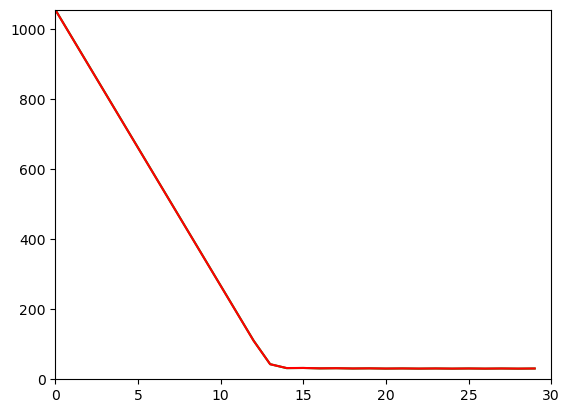

In [115]:
tf.compat.v1.disable_eager_execution()
# tf.compat.v1.enable_eager_execution()
import matplotlib.pyplot as plt 
import tensorflow as tf 
import numpy as np 

from sklearn.datasets import load_boston

def append_bias_reshape(x_train,y_train):
    n_training_samples = x_train.shape[0]
    n_dim = x_train.shape[1]
    f = np.reshape(np.c_[np.ones(n_training_samples),x_train],[n_training_samples,n_dim+1])
    l = np.reshape(y_train,[n_training_samples,1])
    
    return f,l

if __name__ == '__main__':
    

#     x,y = read_boston_data()
#     norm_features = feature_normalize(x)
    f,l = append_bias_reshape(x_train,y_train)
    n_dim = f.shape[1]

    rnd_indices = np.random.rand(len(f)) < 0.80

    x_train = f[rnd_indices]
    y_train = l[rnd_indices]
    x_test = f[~rnd_indices]
    y_test = l[~rnd_indices]



    learning_rate = 0.0001
    training_epochs = 30
    cost_history = []
    test_history = []

    X = tf.compat.v1.placeholder(tf.float32,[None,n_dim])
    Y = tf.compat.v1.placeholder(tf.float32,[None,1])
    W = tf.Variable(tf.ones([n_dim,1]))

    init = tf.compat.v1.initialize_all_variables()

    y_ = tf.matmul(X,W)
    cost = tf.reduce_mean(tf.abs(y_-Y))
    training_step = tf.compat.v1.train.GradientDescentOptimizer(learning_rate).minimize(cost)

    sess = tf.compat.v1.Session()
    sess.run(init)

    for epoch in range(training_epochs):
        sess.run(training_step,feed_dict={X:x_train,Y:y_train})
        c = sess.run(cost,feed_dict={X:x_train,Y:y_train})
        print(c)
        t = sess.run(cost,feed_dict={X:x_test,Y:y_test})
        print(t)
        cost_history.append(c)
        test_history.append(t)

    plt.plot(range(len(test_history)),test_history,color = 'green')
    plt.plot(range(len(cost_history)),cost_history,color = 'red')

    plt.axis([0,training_epochs,0,np.max(cost_history)])
    plt.show()

347.64478
347.93274
441.17865
440.90033
347.64478
347.93274
441.17865
440.90033
347.64478
347.93274
441.17865
440.90033
347.64478
347.93274
441.17865
440.90033
347.64478
347.93274
441.17865
440.90033
347.64478
347.93274
441.17865
440.90033
347.64478
347.93274
441.17865
440.90033
347.64478
347.93274
441.17865
440.90033
347.64478
347.93274
441.17865
440.90033
347.64478
347.93274
441.17865
440.90033
347.64478
347.93274
441.17865
440.90033
347.64478
347.93274
441.17865
440.90033
347.64478
347.93274
441.17865
440.90033
347.64478
347.93274
441.17865
440.90033
347.64478
347.93274
441.17865
440.90033


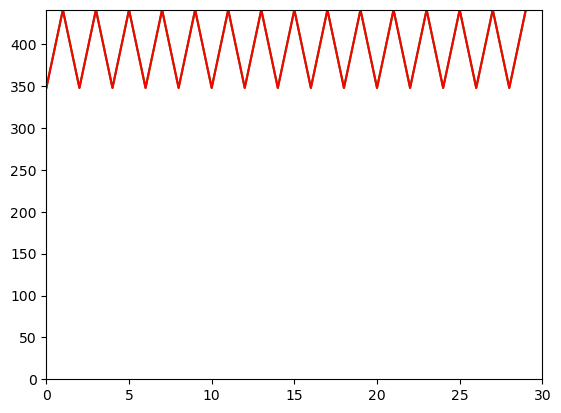

In [116]:
# tf.compat.v1.disable_eager_execution()
# tf.compat.v1.enable_eager_execution()
import matplotlib.pyplot as plt 
import tensorflow as tf 
import numpy as np 

from sklearn.datasets import load_boston

def append_bias_reshape(x_train,y_train):
    n_training_samples = x_train.shape[0]
    n_dim = x_train.shape[1]
    f = np.reshape(np.c_[np.ones(n_training_samples),x_train],[n_training_samples,n_dim+1])
    l = np.reshape(y_train,[n_training_samples,1])
    
    return f,l

if __name__ == '__main__':
    

#     x,y = read_boston_data()
#     norm_features = feature_normalize(x)
    f,l = append_bias_reshape(x_train,y_train)
    n_dim = f.shape[1]

    rnd_indices = np.random.rand(len(f)) < 0.80

    x_train = f[rnd_indices]
    y_train = l[rnd_indices]
    x_test = f[~rnd_indices]
    y_test = l[~rnd_indices]



    learning_rate = 0.001
    training_epochs = 30
    cost_history = []
    test_history = []

    X = tf.compat.v1.placeholder(tf.float32,[None,n_dim])
    Y = tf.compat.v1.placeholder(tf.float32,[None,1])
    W = tf.Variable(tf.ones([n_dim,1]))

    init = tf.compat.v1.initialize_all_variables()

    y_ = tf.matmul(X,W)
    cost = tf.reduce_mean(tf.abs(y_-Y))
    training_step = tf.compat.v1.train.GradientDescentOptimizer(learning_rate).minimize(cost)

    sess = tf.compat.v1.Session()
    sess.run(init)

    for epoch in range(training_epochs):
        sess.run(training_step,feed_dict={X:x_train,Y:y_train})
        c = sess.run(cost,feed_dict={X:x_train,Y:y_train})
        print(c)
        t = sess.run(cost,feed_dict={X:x_test,Y:y_test})
        print(t)
        cost_history.append(c)
        test_history.append(t)

    plt.plot(range(len(test_history)),test_history,color = 'green')
    plt.plot(range(len(cost_history)),cost_history,color = 'red')

    plt.axis([0,training_epochs,0,np.max(cost_history)])
    plt.show()

1129.6991
1129.1133
1121.8109
1121.2249
1113.9229
1113.3369
1106.0348
1105.4487
1098.1465
1097.5605
1090.2583
1089.6724
1082.3702
1081.7842
1074.482
1073.896
1066.5939
1066.0078
1058.7058
1058.1195
1050.8175
1050.2314
1042.9294
1042.3433
1035.0413
1034.4551
1027.1532
1026.5669
1019.265
1018.6788
1011.37683
1010.7906
1003.4888
1002.9024
995.6005
995.0142
987.71246
987.1261
979.8243
979.2379
971.93616
971.34973
964.04803
963.46155
956.1598
955.5733
948.27167
947.68506
940.3835
939.79694
932.4954
931.9087
924.6072
924.0206
916.71906
916.1324
908.8309
908.2443
900.9428
900.35614
893.05457
892.46783
885.16644
884.5797
877.2784
876.69147
869.39014
868.80347
861.50195
860.9152
853.61383
853.027
845.72577
845.13885
837.8375
837.2506
829.94934
829.3626
822.0612
821.4744
814.1731
813.58606
806.285
805.6979
798.3968
797.8097
790.5087
789.92175
782.6205
782.0334
774.7324
774.1454
766.8442
766.25714
758.956
758.36896
751.0679
750.4808
743.1799
742.5925
735.2916
734.70435
727.40344
726.8162
719.5153

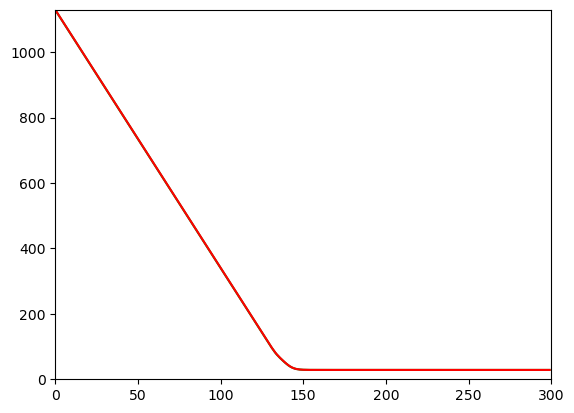

In [117]:
# tf.compat.v1.disable_eager_execution()
# tf.compat.v1.enable_eager_execution()
import matplotlib.pyplot as plt 
import tensorflow as tf 
import numpy as np 

from sklearn.datasets import load_boston

def append_bias_reshape(x_train,y_train):
    n_training_samples = x_train.shape[0]
    n_dim = x_train.shape[1]
    f = np.reshape(np.c_[np.ones(n_training_samples),x_train],[n_training_samples,n_dim+1])
    l = np.reshape(y_train,[n_training_samples,1])
    
    return f,l

if __name__ == '__main__':
    

#     x,y = read_boston_data()
#     norm_features = feature_normalize(x)
    f,l = append_bias_reshape(x_train,y_train)
    n_dim = f.shape[1]

    rnd_indices = np.random.rand(len(f)) < 0.80

    x_train = f[rnd_indices]
    y_train = l[rnd_indices]
    x_test = f[~rnd_indices]
    y_test = l[~rnd_indices]



    learning_rate = 0.00001
    training_epochs = 300
    cost_history = []
    test_history = []

    X = tf.compat.v1.placeholder(tf.float32,[None,n_dim])
    Y = tf.compat.v1.placeholder(tf.float32,[None,1])
    W = tf.Variable(tf.ones([n_dim,1]))

    init = tf.compat.v1.initialize_all_variables()

    y_ = tf.matmul(X,W)
    cost = tf.reduce_mean(tf.abs(y_-Y))
    training_step = tf.compat.v1.train.GradientDescentOptimizer(learning_rate).minimize(cost)

    sess = tf.compat.v1.Session()
    sess.run(init)

    for epoch in range(training_epochs):
        sess.run(training_step,feed_dict={X:x_train,Y:y_train})
        c = sess.run(cost,feed_dict={X:x_train,Y:y_train})
        print(c)
        t = sess.run(cost,feed_dict={X:x_test,Y:y_test})
        print(t)
        cost_history.append(c)
        test_history.append(t)

    plt.plot(range(len(test_history)),test_history,color = 'green')
    plt.plot(range(len(cost_history)),cost_history,color = 'red')

    plt.axis([0,training_epochs,0,np.max(cost_history)])
    plt.show()

1137.8618
1137.544
1137.073
1136.7551
1136.2843
1135.9663
1135.4954
1135.1776
1134.7067
1134.3888
1133.9177
1133.6
1133.129
1132.8112
1132.3401
1132.0223
1131.5514
1131.2335
1130.7627
1130.4448
1129.9738
1129.656
1129.185
1128.8672
1128.3962
1128.0785
1127.6073
1127.2896
1126.8186
1126.5009
1126.0298
1125.712
1125.241
1124.9233
1124.4521
1124.1343
1123.6633
1123.3456
1122.8745
1122.5568
1122.0857
1121.7681
1121.2969
1120.9791
1120.5082
1120.1904
1119.7194
1119.4015
1118.9305
1118.6129
1118.1417
1117.824
1117.3528
1117.0353
1116.5641
1116.2465
1115.7754
1115.4576
1114.9865
1114.669
1114.1978
1113.88
1113.4089
1113.0913
1112.6201
1112.3025
1111.8313
1111.5135
1111.0425
1110.7249
1110.2537
1109.936
1109.4648
1109.1473
1108.676
1108.3585
1107.8873
1107.5697
1107.0984
1106.7808
1106.3097
1105.9921
1105.5208
1105.2032
1104.7319
1104.4146
1103.9434
1103.6257
1103.1544
1102.8369
1102.3656
1102.0481
1101.5768
1101.2593
1100.7881
1100.4705
1099.9991
1099.6816
1099.2104
1098.8928
1098.4216
1098.1

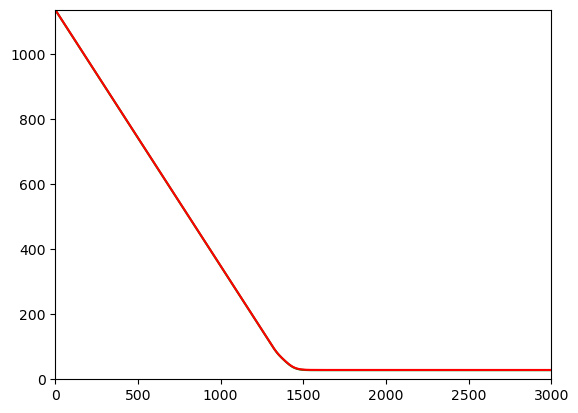

In [118]:
# tf.compat.v1.disable_eager_execution()
# tf.compat.v1.enable_eager_execution()
import matplotlib.pyplot as plt 
import tensorflow as tf 
import numpy as np 

from sklearn.datasets import load_boston

def append_bias_reshape(x_train,y_train):
    n_training_samples = x_train.shape[0]
    n_dim = x_train.shape[1]
    f = np.reshape(np.c_[np.ones(n_training_samples),x_train],[n_training_samples,n_dim+1])
    l = np.reshape(y_train,[n_training_samples,1])
    
    return f,l

if __name__ == '__main__':
    

#     x,y = read_boston_data()
#     norm_features = feature_normalize(x)
    f,l = append_bias_reshape(x_train,y_train)
    n_dim = f.shape[1]

    rnd_indices = np.random.rand(len(f)) < 0.80

    x_train = f[rnd_indices]
    y_train = l[rnd_indices]
    x_test = f[~rnd_indices]
    y_test = l[~rnd_indices]



    learning_rate = 0.000001
    training_epochs = 3000
    cost_history = []
    test_history = []

    X = tf.compat.v1.placeholder(tf.float32,[None,n_dim])
    Y = tf.compat.v1.placeholder(tf.float32,[None,1])
    W = tf.Variable(tf.ones([n_dim,1]))

    init = tf.compat.v1.initialize_all_variables()

    y_ = tf.matmul(X,W)
    cost = tf.reduce_mean(tf.abs(y_-Y))
    training_step = tf.compat.v1.train.GradientDescentOptimizer(learning_rate).minimize(cost)

    sess = tf.compat.v1.Session()
    sess.run(init)

    for epoch in range(training_epochs):
        sess.run(training_step,feed_dict={X:x_train,Y:y_train})
        c = sess.run(cost,feed_dict={X:x_train,Y:y_train})
        print(c)
        t = sess.run(cost,feed_dict={X:x_test,Y:y_test})
        print(t)
        cost_history.append(c)
        test_history.append(t)

    plt.plot(range(len(test_history)),test_history,color = 'green')
    plt.plot(range(len(cost_history)),cost_history,color = 'red')

    plt.axis([0,training_epochs,0,np.max(cost_history)])
    plt.show()